In [14]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import ipyleaflet
from ipyleaflet import Map, basemaps, basemap_to_tiles, DrawControl, projections,GeoJSON,GeoData
import seaborn
import contextily
from sklearn.cluster import DBSCAN
import numpy as np

In [15]:
thailandmap = gpd.read_file('data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}

burnscar = gpd.read_file("data\Burnt_LC0809_20240101_0531_Prv\Burnt_LC0809_20240101_0531_Prv.shp",crs=3857)
burnscar = burnscar.to_crs(4326)

hotspot = gpd.read_file("data\\DL_FIRE_SV-C2_571430\\fire_nrt_SV-C2_571430.shp",crs=4326)

sugarcanearea = gpd.read_file("data\\แผนที่สภาพการใช้ที่ดิน (แยกเอาเฉพาะที่เป็นอ้อย) -2022-2023\\พื้นที่ปลูกอ้อย.geojson")
sugarcanearea = sugarcanearea.to_crs(4326)

sugarplant = gpd.read_file("data\\ตำแหน่งโรงงานน้ำตาล\\โรงงานน้ำตาล.geojson")
sugarplant = sugarplant.to_crs(4326)

d:\workstation\ESDA_Sugarcan_vs_Hotspot\env\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
d:\workstation\ESDA_Sugarcan_vs_Hotspot\env\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option CRS
  return ogr_read(
d:\workstation\ESDA_Sugarcan_vs_Hotspot\env\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option CRS
  return ogr_read(


239


C:\Users\595078\AppData\Local\Temp\ipykernel_10368\4120075741.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot = seaborn.kdeplot(


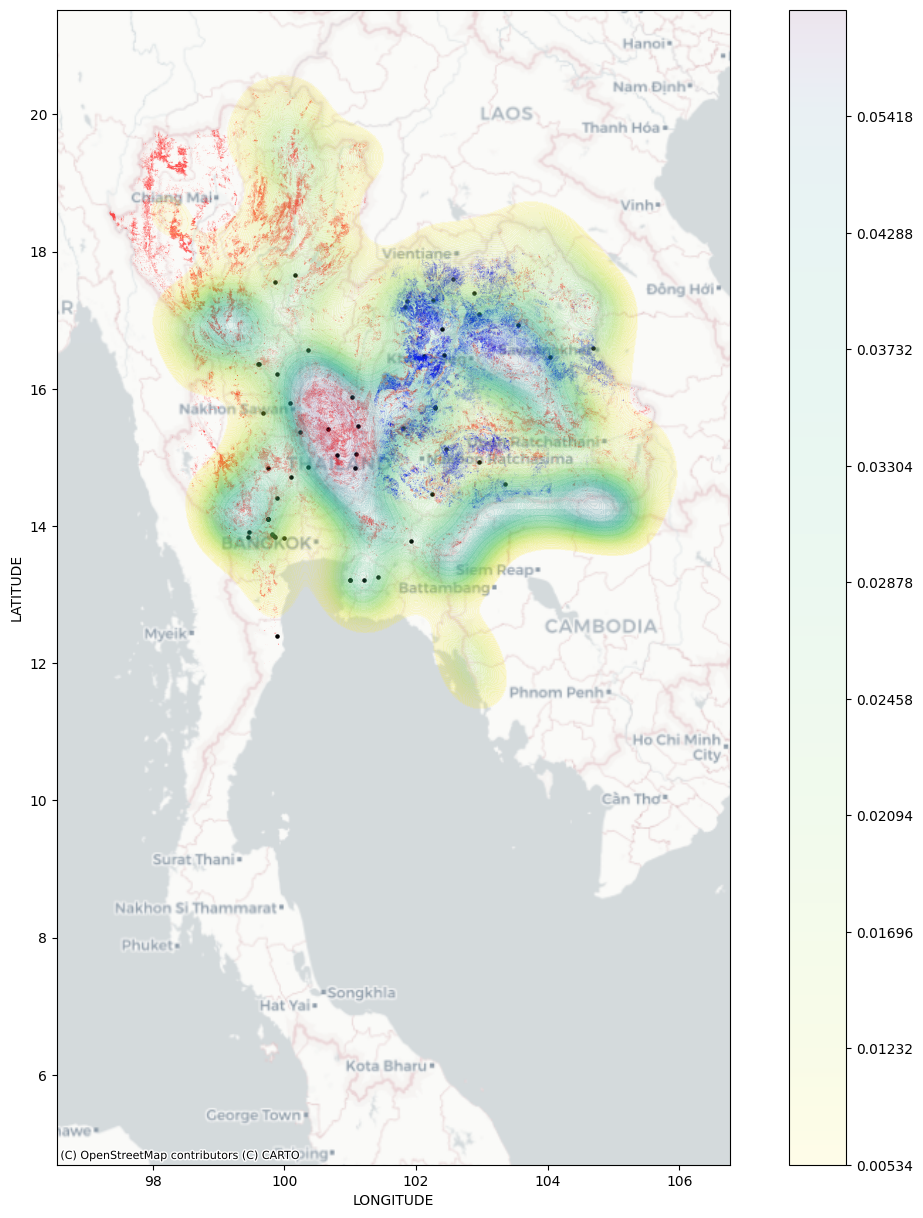

In [16]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(15, 15))

ax.scatter(sugarplant['x'], sugarplant['y'], color='black', s=5, label='Points')
burnscar.plot(ax=ax, color='red',alpha = 0.7)
sugarcanearea.plot(ax=ax, color='blue',alpha = 1)

# Generate and add KDE with a shading of 50 gradients
# coloured contours, 75% of transparency,
# and the reverse viridis colormap

levels = int(round(len(hotspot) * 0.01,0))
print(levels)
kdeplot = seaborn.kdeplot(
    x="LONGITUDE",
    y="LATITUDE",
    data=hotspot,
    n_levels=levels,
    shade=True,
    alpha=0.1,
    cmap="viridis_r",
    cbar=True
)

# Add basemap
contextily.add_basemap(
    ax,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.Positron
)

ax.label_outer()
# Remove axes
# ax.set_axis_off()

In [17]:
#### Create bounding box for Northeastern area ###
from shapely import geometry

p1 = geometry.Point(101,18.5)
p2 = geometry.Point(106,18.5)
p3 = geometry.Point(106,14)
p4 = geometry.Point(101,14)
pointList = [p1, p2, p3, p4,p1]

poly = geometry.Polygon([[p.x, p.y] for p in pointList])
print(poly.wkt)

POLYGON ((101 18.5, 106 18.5, 106 14, 101 14, 101 18.5))


In [18]:
#### Filter out only Northeastern ######
hotspot_ne = hotspot.loc[hotspot.geometry.within(poly)]
burnscar_ne = burnscar.loc[burnscar.geometry.within(poly)]
sugarcanearea_ne = sugarcanearea.loc[sugarcanearea.geometry.within(poly)]
sugarplant_ne = sugarplant.loc[sugarplant.geometry.within(poly)]
print(sugarcanearea_ne.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 157810 entries, 0 to 157809
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   LU_ID_L1    157810 non-null  float64 
 1   LU_ID_L2    157810 non-null  float64 
 2   LU_ID_L3    157810 non-null  float64 
 3   LU_CODE     157810 non-null  object  
 4   LU_DES_TH   157810 non-null  object  
 5   LU_DES_EN   157810 non-null  object  
 6   LUL1_CODE   157810 non-null  object  
 7   LUL2_CODE   157810 non-null  object  
 8   LU_DES      95 non-null      object  
 9   Shape_Leng  61388 non-null   float64 
 10  Shape_Area  157810 non-null  float64 
 11  RAI         157810 non-null  object  
 12  OBJECTID    64590 non-null   float64 
 13  layer       157810 non-null  object  
 14  path        157810 non-null  object  
 15  geometry    157810 non-null  geometry
dtypes: float64(6), geometry(1), object(9)
memory usage: 20.5+ MB
None


124


C:\Users\595078\AppData\Local\Temp\ipykernel_10368\3050605448.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot = seaborn.kdeplot(


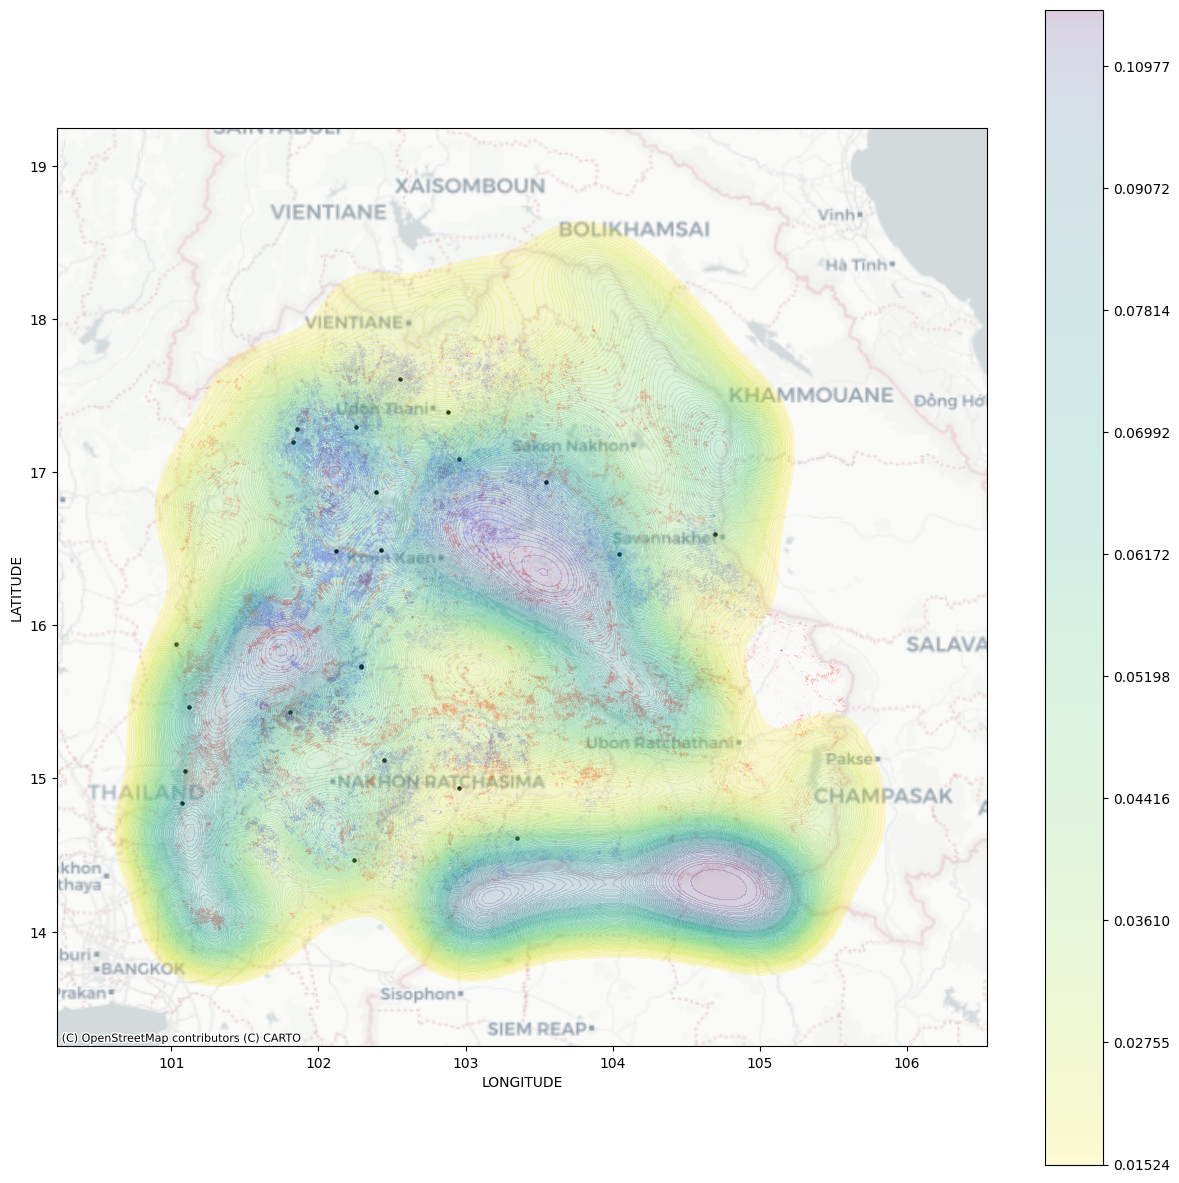

In [19]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(15, 15))

ax.scatter(sugarplant_ne['x'], sugarplant_ne['y'], color='black', s=5, label='Points')
burnscar_ne.plot(ax=ax, color='red',alpha = 0.8)
sugarcanearea_ne.plot(ax=ax, color='blue',alpha = 0.6)

# Generate and add KDE with a shading of 50 gradients
# coloured contours, 75% of transparency,
# and the reverse viridis colormap

levels = int(round(len(hotspot_ne) * 0.01,0))
print(levels)
kdeplot = seaborn.kdeplot(
    x="LONGITUDE",
    y="LATITUDE",
    data=hotspot_ne,
    n_levels=levels,
    shade=True,
    alpha=0.2,
    cmap="viridis_r",
    cbar=True
)

# Add basemap
contextily.add_basemap(
    ax,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.Positron
)

ax.label_outer()
# Remove axes
# ax.set_axis_off()

In [20]:
# #### Create bounding box for วังสะพุง, ภูหลวง และนากลาง area ###
# from shapely import geometry

p1 = geometry.Point(101,18.2)
p2 = geometry.Point(103,18.2)
p3 = geometry.Point(103,16.5)
p4 = geometry.Point(101,16.5)
pointList = [p1, p2, p3, p4,p1]

poly = geometry.Polygon([[p.x, p.y] for p in pointList])
print(poly.wkt)

# #### Filter out ######
burnscar_ne_s = burnscar_ne.loc[burnscar_ne.geometry.within(poly)]
sugarcanearea_ne_s = sugarcanearea_ne.loc[sugarcanearea_ne.geometry.within(poly)]
hotspot_ne_s = hotspot_ne.loc[hotspot_ne.geometry.within(poly)]
sugarplant_ne_s = sugarplant_ne.loc[sugarplant_ne.geometry.within(poly)]

POLYGON ((101 18.2, 103 18.2, 103 16.5, 101 16.5, 101 18.2))


In [21]:
##### Find overlapped area of the burnscar over sugarcane area ##### 

from shapely.geometry import Polygon
sugarcanearea_ne_s_vast = sugarcanearea_ne_s.geometry.union_all()
burnscar_ne_s['overlappedwithsugarcanearea'] = burnscar_ne_s.overlaps(sugarcanearea_ne_s_vast,align=True)
burnscar_ne_s_overlappedwithsugarcanearea = burnscar_ne_s.loc[burnscar_ne_s['overlappedwithsugarcanearea'] == True]

d:\workstation\ESDA_Sugarcan_vs_Hotspot\env\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


124


C:\Users\595078\AppData\Local\Temp\ipykernel_10368\593546907.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot = seaborn.kdeplot(


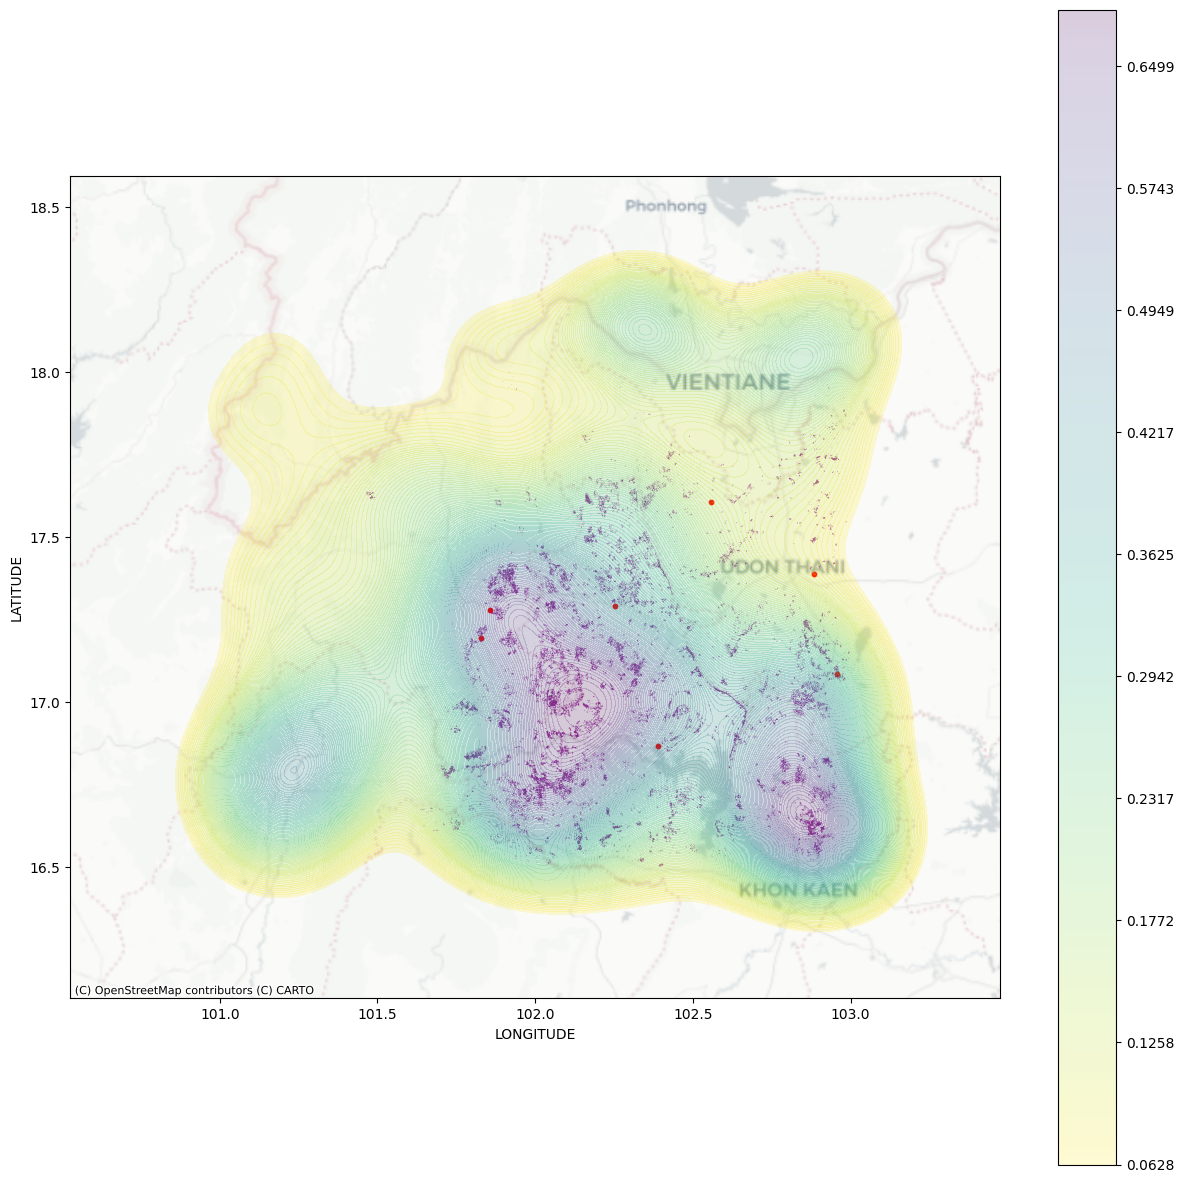

In [24]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(15, 15))

ax.scatter(sugarplant_ne_s['x'], sugarplant_ne_s['y'], color='red', s=10, label='Points')
burnscar_ne_s_overlappedwithsugarcanearea.plot(ax=ax, color='purple',alpha = 0.8)

# Generate and add KDE with a shading of 50 gradients
# coloured contours, 75% of transparency,
# and the reverse viridis colormap

levels = int(round(len(hotspot_ne) * 0.01,0))
print(levels)
kdeplot = seaborn.kdeplot(
    x="LONGITUDE",
    y="LATITUDE",
    data=hotspot_ne_s,
    n_levels=levels,
    shade=True,
    alpha=0.2,
    cmap="viridis_r",
    cbar=True
)

# Add basemap
contextily.add_basemap(
    ax,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.Positron
)

ax.label_outer()
# Remove axes
# ax.set_axis_off()